#**Deploy de APIs em Data Science**

### TL-DR:

- Nesta aula iremos demonstrar como criar uma API com um serviço de Data Science. Como criar uma imagem para isolar a aplicação e manter as configurações recomendadas.

- A aula será dividida em 3 partes:

    #### Parte 1): Discussão da importância de criação de APIs para um Cientista de Dados. Introdução sobre APIs e métodos HTTP. 
            
         Na primeira parte da aula, vamos discutir a importância da criação de APIs no Escopo de Atuação de um Cientista de Dados. Faremos uma revisão do protocolo HTTP, e especialmente sobre os métodos (GET e POST). 
    
    #### Parte 2): Criando um repositório no GitHub para subirmos uma aplicação. Revisão de Boas Práticas.
        
        Na segunda parte da aula, subiremos a aplicação criada num repositório do GitHub que vamos criar. Discutiremos algumas boas práticas para subir a aplicação.
        
    #### Parte 3): "Na minha máquina funciona": Criando uma imagem do Docker para rodar a aplicação.
    
        Na terceira parte da aula, iremos simular a construção da imagem e subida de aplicação em um novo ambiente.

     
    
      


# **Parte 1:Introdução sobre APIs e métodos HTTP.**

Saber fazer deploy é muito importante para a criação de produtos de dados. Citando o cientista de dados Ivan Marin, "mais vale um modelo em deploy do que dois no notebook.", ele está repleto de razão!

## Cientista de Dados Vs. Engenheiro de Dados 

Em um mundo ideal, um Cientista de Dados deve ser responsável pela concepção e modelagem de um problema de dados, enquanto um Engenheiro de Dados seria responsável por garantir a performance e escalabilidade destas soluções.

Portanto, sob um ponto de vista, o Cientista de Dados não necessita conhecer profundamente detalhes sobre a criação de APIs para permitir que seus projetos devam entrar em produção - o que seria uma tarefa do Engenheiro de Dados.

<img src="https://elu.nl/wp-content/uploads/2019/03/Data-Engineer-vs-Data-Scientist-vs-Data-Analyst.png" width=120%>

Por outro lado, o Cientista de Dados é o principal responsável por garantir e demonstrar que seus modelos funcionam. Considerando que a principal linguagem de programação usada pelos Cientistas de Dados (o Python) está em constante evolução, e o uso de diversas bibliotecas às quais se faz uso para construí-las. 

Por isso, é importante que o Cientista de Dados saiba garantir a reprodutibilidade de seus experimentos.


## Como funciona o protocolo HTTP

A internet trafega através do protocolo **HTTP (*Hypertext Transfer Protocol*)**. O protocolo HTTP foi criado por **Tim Berners-Lee**, o criador da web, enquanto ele trabalhava na CERN em 1989 (sua equipe e ele também foram responsáveis pelo HTML).

O HTTP possui duas entidades básicas: a **Request (pedido)** e a **Response (resposta)**

Sempre que entramos em uma página, enviamos uma request para o servidor do site e esperamos uma response com o HTML da página.

Sempre que enviamos um ***Request (pedido)*** devemos especificar um método. A tabela abaixo cita os métodos mais comuns e explica brevemente o objetivo de cada um:

| Método |        Objetivo       |
|:------:|:---------------------:|
| GET    | Obter informações     |
| POST   | Salvar informações    |
| PUT    | Atualizar informações |
| DELETE | Deletar informações   |

Todos eles são comumente utilizados por APIs.

O método ***GET*** é utilizado quando os parâmetros são passados no cabeçalho da requisição. Por isso, podem ser vistos pela URL. Desvantagens: tamanho máximo (255 caracteres) e falta de segurança

O metódo ***POST*** permite o envie de dados mais complexos, como imagens e objetos.

Além do método, as requisições também possuem um **header**:

O **Header (cabeçalho)** tem a função de dizer para o servidor diversos dados sobre quem fez a solicitação. Dessa forma, o servidor consegue até permitir que você veja mais informações dependendo do seu nível de acesso.

## PROTOCOLO DE COMUNICAÇÃO HTTP
<img src="https://www.pubnub.com/wp-content/uploads/2014/11/HTTP-LONG-POLLING.png">
<br>
Os clientes, nossos computadores, conseguem acessar páginas e aplicações na internet através deste protocolo, que responde as requisições com arquivos de acordo com seu nível de acesso e com o que foi solicitado.
Se você acessar o site da Digital House por exemplo e pedir para inspecionar (no Chrome `Ctrl+Shift+i`) os dados de rede, vai ver todos as solicitações e respostas do seu navegador ao servidor.
<br>
O resultado será algo parecido com isso:
<img src="https://developer.chrome.com/devtools/images/network-panel.png">

# Códigos de status
A solicitação que acabamos de fazer tinha um código de status de 200. Os códigos de status são retornados com cada solicitação feita para um servidor da web. Códigos de status indicam informações sobre o que aconteceu com uma solicitação. Aqui estão alguns códigos que são relevantes para solicitações GET :

- 200 - tudo correu bem, e o resultado foi devolvido (se houver)
- 301- o servidor está redirecionando você para um terminal diferente. Isso pode acontecer quando uma empresa troca nomes de domínio ou um nome de terminal é alterado.
- 401- o servidor acha que você não está autenticado. Isso acontece quando você não envia as credenciais corretas para acessar uma API (falaremos sobre autenticação em uma postagem posterior).
- 400- o servidor acha que você fez um pedido incorreto. Isso pode acontecer quando você não envia os dados corretos, entre outras coisas.
- 403 - o recurso que você está tentando acessar é proibido - você não tem as permissões certas para visualizá-lo.
- 404 - o recurso que você tentou acessar não foi encontrado no servidor.

Se tentarmos acessar um site ou endereço que não existe, receberemos o código acima.

In [0]:
import requests

response = requests.get("http://www.globo.com/cursos/data_science")
print(response.status_code)

404


In [0]:
response = requests.get("http://api.open-notify.org/iss-pass.json")
print(response.status_code)

400


200


'<!doctype html><html lang="en"><head><meta charset="UTF-8"><meta content="/images/branding/googleg/1x/googleg_standard_color_128dp.png" itemprop="image"><title>artificial intelligence - Google Search</title><script nonce="pQK3csW/vA+9kYtjVZSrcQ==">(function(){\ndocument.documentElement.addEventListener("submit",function(b){var a;if(a=b.target){var c=a.getAttribute("data-submitfalse");a="1"==c||"q"==c&&!a.elements.q.value?!0:!1}else a=!1;a&&(b.preventDefault(),b.stopPropagation())},!0);document.documentElement.addEventListener("click",function(b){var a;a:{for(a=b.target;a&&a!=document.documentElement;a=a.parentElement)if("A"==a.tagName){a="1"==a.getAttribute("data-nohref");break a}a=!1}a&&b.preventDefault()},!0);}).call(this);(function(){\nvar a=window.performance;window.start=(new Date).getTime();a:{var b=window;if(a){var c=a.timing;if(c){var d=c.navigationStart,f=c.responseStart;if(f>d&&f<=window.start){window.start=f;b.wsrt=f-d;break a}}a.now&&(b.wsrt=Math.floor(a.now()))}}window.go
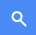
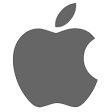
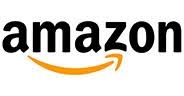
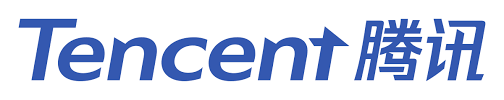
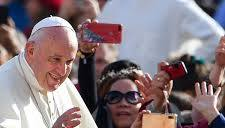
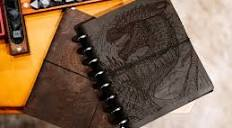
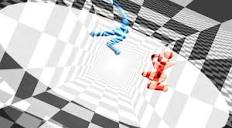
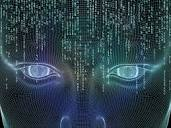
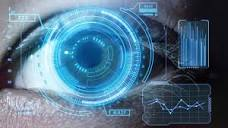

In [0]:
# This is the latitude and longitude of New York City.
parameters = {"q": 'artificial intelligence'}

# Make a get request with the parameters.
response = requests.get("http://google.com/search", params=parameters)
print(response.status_code)

# Equivalente a URL: http://google.com/search?q=data+science

response.text

# O que é uma API?

Podemos dizer que uma API é como se fosse uma página da web para **softwares**. Só eles conseguirem acessar, ler e interagir da maneira adequada com as APIs.

Ao trabalhar com projetos que envolvem dados, é muito comum vocês utilizarão APIs tanto internas (fornecidas pelas próprias empresas em que vocês trabalham) quanto externas.

APIs são uma das principais formas para se obter dados que devem ser analisados.

<center>
<img src="https://cdn-images-1.medium.com/max/1600/1*CkynRe-J1FVnUAk7JmOTdQ.gif" alt="drawing" width="600px"></center>

## Por que acessar uma API ao invés de um banco de dados diretamente?

Porque o mundo está cheio de pessoas mal intencionadas e ao dar acesso direto ao banco de dados você está correndo risco de ter seus dados apagados, alterados ou que as pessoas tenham acesso a dados que deveriam ser confidênciais.

É uma forma de separar, controlar e até multiplicar os acessos a sistemas de forma organizada.
Imagine se cada cliente de um restaurante fosse fazer os pedidos direto ao Chef na cozinha, é provável que os pedidos saiam errados, fora de ordem ou o Chef fique estressado, por isso existe o garçom que faz o papel de levar os pedidos e trazer a comida organizando uma fila de pedidos.
A API faz exatamente isso, controlando o que pedir e para quem pedir.

<img src="https://cdn-images-1.medium.com/max/1600/1*Elr2TpvMI7xfSack20B6bA.png">

Mas por que usar uma API em vez de um conjunto de dados estático que você pode baixar? As APIs são úteis nos seguintes casos:

- Os dados estão mudando rapidamente. Um exemplo disso são os dados do preço das ações. Não faz muito sentido regenerar um conjunto de dados e baixá-lo a cada minuto - isso demandará muita largura de banda e será bastante lento.
- Você quer um pequeno pedaço de um conjunto muito maior de dados. Comentários do Reddit são um exemplo. E se você quiser apenas puxar seus próprios comentários no Reddit? Não faz muito sentido baixar todo o banco de dados Reddit, depois filtrar apenas seus próprios comentários.
- Há computação repetida envolvida. Spotify tem uma API que pode dizer o gênero de uma peça musical. Você poderia, teoricamente, criar seu próprio classificador e usá-lo para categorizar a música, mas nunca terá tantos dados quanto o Spotify.




In [0]:
#!pip3 install requests --user

In [2]:
import requests

response = requests.get("http://api.open-notify.org/iss-pass")
print(response.status_code)

404


In [3]:
response = requests.get("http://api.open-notify.org/iss-pass.json")
print(response.status_code)

400


___

In [4]:
# Este comando busca os mesmos dados que o comando que usamos para buscar os dados de São Paulo acima
response = requests.get("http://api.open-notify.org/iss-pass.json?lat=-23.68&lon=-46.87")
response.json()

{'message': 'success',
 'request': {'altitude': 100,
  'datetime': 1585775616,
  'latitude': -23.68,
  'longitude': -46.87,
  'passes': 5},
 'response': [{'duration': 588, 'risetime': 1585796800},
  {'duration': 620, 'risetime': 1585802583},
  {'duration': 406, 'risetime': 1585826423},
  {'duration': 657, 'risetime': 1585832136}]}

# Próximos passos

Há milhares de APIs e cada uma delas tem um jeito próprio de lidar, ou seja, de fazer nossas solicitações de dados e envio de dados.

Uma das muitas vantagens das APIs é tornar as soluções encaixaveis e reutilizaveis em outros programas.

Na nossa área de ciência de dados, não só utilizamos APIs para consultar dados mas muitas vezes para fornecer nossa aplicação de machine learning como um serviço.

É interessante entregar um serviço como uma API. Recomendo que comecem a pensar nos serviços que vocês entregam de forma repetitiva da mesma forma.

É possível criar uma API com a biblioteca em python `flask` 
com pouquissimas linhas de código.



# **Parte 2: Subir o projeto no GitHub**

<img src='https://upload.wikimedia.org/wikipedia/commons/thumb/e/e0/Git-logo.svg/1200px-Git-logo.svg.png' width=300>

No dia-a-dia do Cientista de Dados (e de desenvolvedores em geral), trabalhamos em projetos longos em paralelo com outros desenvolvedores.

Por isso, utilizamos o Git, sistema de versionamento de projetos que nos permite manter o histórico de evoluções dos nossos projetos, e trabalharmos paralelamente com outras pessoas.

Primeiros passos:

- Entrar em https://github.com/ , criar uma conta e um repositório com README.md
- Clonar repositório com git clone  <nome_do_repositorio>
- Copiar conteúdo da pasta <seu_app> para dentro do repositório.



## **Fazer um commit do projeto.**

No mundo real, é EXTREMAMENTE **não-recomendado fazer um commit direto na master**, pois as mudanças (saudáveis ou não) afetarão todos que trabalham no projeto.

<img src="https://image.slidesharecdn.com/versioncontrolgit-180130175149/95/version-control-git-3-638.jpg?cb=1517335204">


Logo, entrar no repositório e digitar os seguintes comandos para criar uma branch: 

- git checkout -b <nome_da_branch> (exemplo: git checkout -b nova_feature)
- git status (exibe em vermelho as mudanças ainda não prontas para commit e em verde as mudanças prontas para o commit)
- git commit -m "nome do commit" (qualquer mensagem que identifique o commit)
- git push origin <nome_da_branch> (exemplo: git push origin nova_feature)

Agora, entre no seu repositório no git e observe as diferenças.

# **Parte 3: Criar uma imagem Docker**

-  Criar uma conta no Docker e entrar em https://labs.play-with-docker.com/
-  Criar em "Create New Instance"
-  No terminal, clonar o projeto do GitHub (git clone <nome_do_projeto>)



# **O que é __[Docker](https://www.docker.com/)__ e pra que serve?**

 
<img src="https://miro.medium.com/max/1410/1*_yLtFLrInArC3WCcQHVJcQ.png" align="center">

Antes de discutir o que é Docker, vamos ter bem claro o que essa ferramenta não é. Embora análogo a outras ferramentas de virtualização de software, ele não é uma ferramenta tradicional desse tipo, como VMs. Seu funcionamento e premissas são bem diferentes a das outras ferramentas por introduzir o conceito de Containers. Portanto, não trate Docker como um virtualizador tradicional.<br>
Docker é um **gerenciador de Containers** que fornece uma camada de abstração e automação para virtualização de sistemas e softwares. Um Container, por sua vez, é:

"A container is a standard unit of software that packages up code and all its dependencies so the application runs quickly and reliably from one computing environment to another. A Docker container image is a lightweight, standalone, executable package of software that includes everything needed to run an application: code, runtime, system tools, system libraries and settings." - Docker, Inc

Os Containers conseguem, portanto, isolar o software em desenvolvimento de seu ambiente, e sem ambiente interferindo no seu funcionamento, ele se torna padrão. Com isso, um Container é tem uma garantia muito maior de rodar nas máquinas alvo. Ao utilizarmos a arquitetura de Containers, temos as seguintes vantagens:

 - **Padronização e portabilidade:** garantia de que seu software rode da mesma forma em diversas máquinas, o que facilita sua portabilidade e escalabilidade
 - **Docker é leve:** ao somente depender do kernel de execução da máquina, um Container pode se apoiar nele e carregar somente o necessário para sua execução. Além disso, a vida de um Container está restrita à sua execução: enquanto ele não é utilizado, ele não está sendo computado
 - **Segurança e Robustez**
 
## **Partes e Elementos principais do Docker**
As principais partes do software Docker são:
 - Docker Daemon: gerenciador de containers Docker em seu host. É ele quem vai fazer conexão do cliente com instruções kernel
 - Docker CLI: ferramenta de comunicação com o Daemon
 - Docker image index: repositório, público ou privado, de imagens Docker
 



Os principais elementos de Docker são:
 - Containers: diretórios que contém todos os elementos necessários para su aplicação. Podem ser agrupados para shipping entre diversas máquinas e plataformas. Containers permitem que seu projeto seja portátil e isolado, bem como o gerenciamento comum de recursos. Para entender esse gerenciamento, precisamos entender como os containers são construídos. O Docker, ao instanciar um container, o faz por camadas, e somente constrói novas camadas se elas apresentarem novas dependências. Os containers são iniciados a partir de Images.
 - Images: imagens instantâneas (de execução) de um Container, são a base de construção de um Container. Aqui no __[DockerHub](https://hub.docker.com/)__ existem diversas imagens open source para você ter um quickstart!
 - Dockerfiles: scripts que automatizam a construção de uma Image. Os principais comandos utilizados via shell ou Dockerfile estão __[neste artigo](https://towardsdatascience.com/15-docker-commands-you-should-know-970ea5203421)__ e __[nesse artigo](https://geekflare.com/docker-commands/)__. 
 
Os comandos mais comuns são:
 - attach:   Attach to a running container
 - build:     Build a container from a Dockerfile
 - commit:    Create a new image from a container's changes
 - cp:        Copy files/folders from the containers filesystem to the host path
 - diff:      Inspect changes on a container's filesystem
 - events:    Get real time events from the server
 - export:    Stream the contents of a container as a tar archive
 - history:   Show the history of an image
 - images:    List images
 - import:    Create a new filesystem image from the contents of a tarball
 - info:      Display system-wide information
 - insert:    Insert a file in an image
 - inspect:   Return low-level information on a container
 - kill:      Kill a running container
 - load:      Load an image from a tar archive
 - login:     Register or Login to the docker registry server
 - logs:      Fetch the logs of a container
 - port:      Lookup the public-facing port which is NAT-ed to PRIVATE_PORT
 - ps:        List containers
 - pull:      Pull an image or a repository from the docker registry server
 - push:      Push an image or a repository to the docker registry server
 - restart:   Restart a running container
 - rm:        Remove one or more containers
 - rmi:       Remove one or more images
 - run:       Run a command in a new container
 - save:      Save an image to a tar archive
 - search:    Search for an image in the docker index
 - start:     Start a stopped container
 - stop:      Stop a running container
 - tag:       Tag an image into a repository
 - top:       Lookup the running processes of a container
 - version:   Show the docker version information
 - wait:      Block until a container stops, then print its exit code
 
 
Agora precisamos entender como essa estrutura funciona. Observe a imagem abaixo de uma VM vs Docker:

#**Diferença de VM e Docker**






# Ok, mãos à obra!



### Construir imagem 

```sh
docker build -t flask_app .
```

### Executar imagem 

```sh
docker run --rm -d -p 8000:80 -v $(pwd):/main:z --name my_docker_flask flask_app
```

### Entrar na imagem 

```sh
docker exec -it my_docker_flask bash
```

### Comando para treinamento (requisição GET)

URL_APP:8000/train

### Comando para predição (requisição POST)

curl -i -X POST -H 'Content-Type: application/json' -d '[  {"Age": 85, "Sex": "male", "Embarked": "S"}, {"Age": 24, "Sex": "female", "Embarked": "C"},{"Age": 3, "Sex": "male", "Embarked": "C"}, {"Age": 21, "Sex": "male", "Embarked": "S"}]' URL_APP:8000/predict

### **Projeto baseado em**:

Flask API for training and predicting using scikit learn models. Link: https://github.com/amirziai/sklearnflask/
